In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

/Users/sijia.li/py3_kernel/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
boston['data'].shape

(506, 13)

In [13]:
feature_df=pd.DataFrame(np.array(boston.data),columns=[boston.feature_names])
feature_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


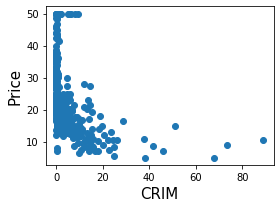

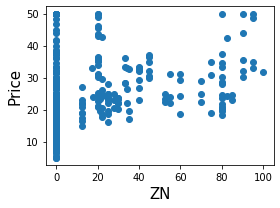

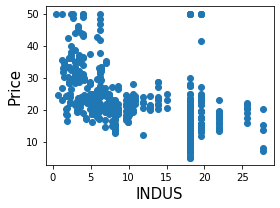

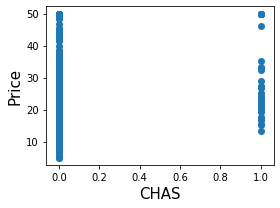

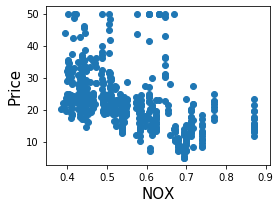

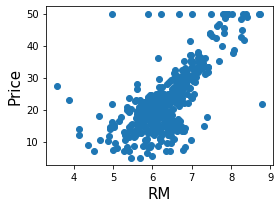

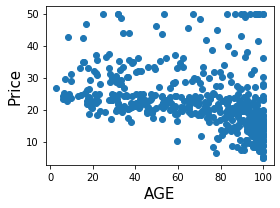

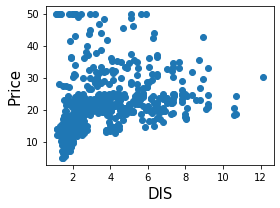

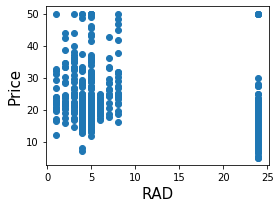

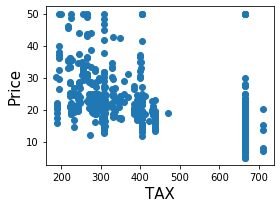

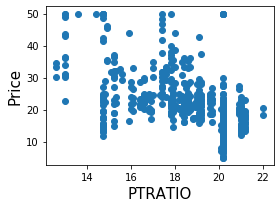

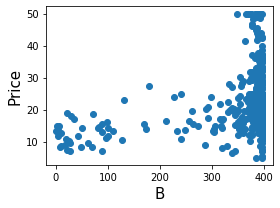

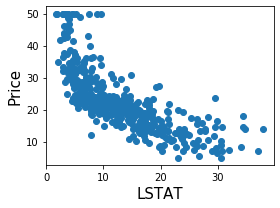

In [14]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(4,3))
    plt.scatter(boston.data[:,index],boston.target)
    
    plt.xlabel(feature_name, size=15)
    plt.ylabel("Price", size = 15)
    
    plt.tight_layout()
plt.show()

In [16]:
price_df=pd.DataFrame(np.array(boston.target),columns=['price'])
price_df.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [20]:
scaler = StandardScaler()
scaler.fit(feature_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
features_scaled_df=pd.DataFrame(data = scaler.transform(feature_df), columns = feature_df.columns)
features_scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [22]:
feature_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
X_train, X_test, Y_train, Y_test = \
    train_test_split(feature_df,price_df,test_size=0.2,random_state=101)

In [24]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
288,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
471,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
176,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20


In [25]:
X_train=X_train.values
X_train[:5]

array([[4.59000e-02, 5.25000e+01, 5.32000e+00, 0.00000e+00, 4.05000e-01,
        6.31500e+00, 4.56000e+01, 7.31720e+00, 6.00000e+00, 2.93000e+02,
        1.66000e+01, 3.96900e+02, 7.60000e+00],
       [9.16400e-02, 0.00000e+00, 1.08100e+01, 0.00000e+00, 4.13000e-01,
        6.06500e+00, 7.80000e+00, 5.28730e+00, 4.00000e+00, 3.05000e+02,
        1.92000e+01, 3.90910e+02, 5.52000e+00],
       [4.03841e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.32000e-01,
        6.22900e+00, 9.07000e+01, 3.09930e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.95330e+02, 1.28700e+01],
       [7.02200e-02, 0.00000e+00, 4.05000e+00, 0.00000e+00, 5.10000e-01,
        6.02000e+00, 4.72000e+01, 3.55490e+00, 5.00000e+00, 2.96000e+02,
        1.66000e+01, 3.93230e+02, 1.01100e+01],
       [1.67600e-01, 0.00000e+00, 7.38000e+00, 0.00000e+00, 4.93000e-01,
        6.42600e+00, 5.23000e+01, 4.54040e+00, 5.00000e+00, 2.87000e+02,
        1.96000e+01, 3.96900e+02, 7.20000e+00]])

In [26]:
X_test=X_test.values
Y_train =Y_train.values
Y_test =Y_test.values

In [27]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [28]:
# Method 1 - Build a model by using scikit-learn

reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print("Weight: ", reg_model.coef_)

Weight:  [[-9.89913563e-02  4.25047578e-02  1.67390094e-02  3.06437882e+00
  -1.56462528e+01  4.01888422e+00 -8.31558474e-04 -1.44628034e+00
   2.67827281e-01 -1.04725485e-02 -8.88651815e-01  8.25262805e-03
  -5.49367192e-01]]


In [30]:
print("Bias: ", reg_model.intercept_)

Bias:  [32.90613091]


In [31]:
predicted = reg_model.predict(X_test)
expected = Y_test

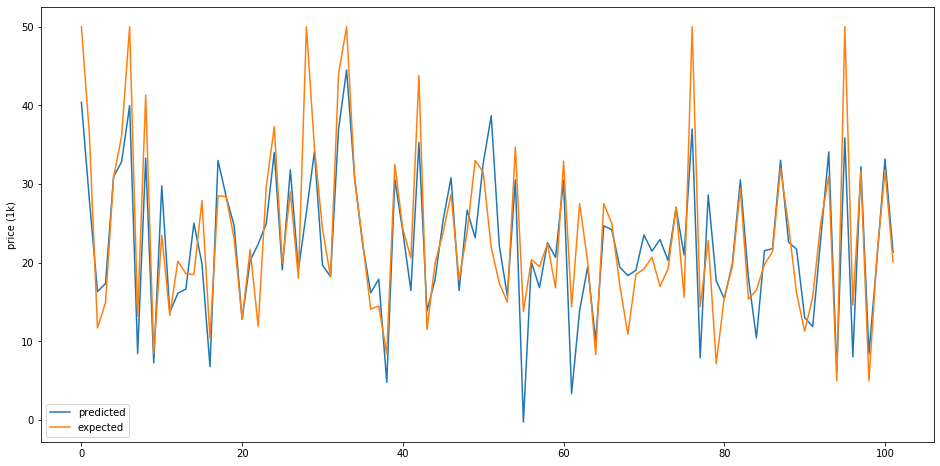

In [34]:
plt.figure(figsize=(16,8))
plt.plot(predicted,label="predicted")
plt.plot(expected, label="expected")
plt.ylabel("price (1k)")
plt.legend()
plt.show()

In [38]:
!source ~/py3_kernel/bin/activate && python -V && pip install tensorflow

Python 3.7.0b4
     |████████████████████████████████| 165.1MB 1.1MB/s eta 0:00:01    |██████████▋                     | 54.8MB 2.6MB/s eta 0:00:43     |██████████████▌                 | 74.6MB 693kB/s eta 0:02:11     |█████████████████▏              | 88.6MB 455kB/s eta 0:02:48
  Using cached https://files.pythonhosted.org/packages/1a/8b/4d01ae9a9d50a0bcc7b0b9aae41785d8d9de6fa9bba04dc20b1582181d2d/h5py-2.10.0-cp37-cp37m-macosx_10_6_intel.whl
     |████████████████████████████████| 71kB 3.8MB/s eta 0:00:01
     |████████████████████████████████| 460kB 482kB/s eta 0:00:01
     |████████████████████████████████| 6.8MB 574kB/s eta 0:00:01    |▎                               | 51kB 570kB/s eta 0:00:12
     |████████████████████████████████| 51kB 3.1MB/s eta 0:00:011
  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
     |████████████████████████████████| 3.3MB 553kB/s eta 0:00:01
     |██████████

  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/1e/a94a8d635fa3ce4cfc7f506003548d0a2447ae76fd5ca53932970fe3053f/pyasn1-0.4.8-py2.py3-none-any.whl
  Stored in directory: /Users/sijia.li/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: /Users/sijia.li/Library/Caches/pip/wheels/b1/c2/ed/d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a
Successfully built termcolor wrapt
You should consider upgrading via the 'pip install --upgrade pip' command.


In [41]:
# Method 2 - Tensorflow
import tensorflow as tf


In [43]:
tf.compat.v1.reset_default_graph()
# run whole dataset 1000 times
epochs=1000
# learning rate at which the model learns from the underlying date -used by the optimizer
learning_rate=0.001
number_features=X_train.shape[1]

In [45]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
X = tf.placeholder(tf.float32,[None, number_features])
# None means the number of data points that we feed is unknown i.e. batch size

Instructions for updating:
non-resource variables are not supported in the long term


In [47]:
y = tf.placeholder(tf.float32,[None, 1])

In [48]:
W = tf.Variable(tf.zeros([number_features,1]),tf.float32)
b = tf.Variable(tf.ones(1),tf.float32)
# set up the linear regression
y_ = tf.matmul(X,W) + b 
# lost function
cost = tf.reduce_mean(tf.square(y-y_))

In [49]:
# plot a histogram summary on TensorBoard to see how the cost function changes during the training
cost_hist=tf.summary.histogram("cost",cost)

In [50]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [52]:
# Train and Visualize the linear regression model
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter('./linear_regression',sess.graph)
    
    for epoch in range(epochs):
#         full batch learning - feeding the entire dataset one-go
        feed_dictionary = {X:X_train, y:Y_train}
        
        result, err = sess.run([optimizer,cost],feed_dict=feed_dictionary)
        
        if epoch%100 == 0:
            print("Epoch: {0}, Error: {1}".format(epoch,err))
            
        print("Epoch: {0}, Error: {1}".format(epoch+1,err))
        
        summary_result = sess.run(merged_summary, feed_dict = feed_dictionary)
        writer.add_summary(summary_result,epoch)
        
    predicted = sess.run(y_,feed_dict={X:X_test})
    writer.close()

Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Epoch: 0, Error: 532.47998046875
Epoch: 1, Error: 532.47998046875
Epoch: 2, Error: 495.61962890625
Epoch: 3, Error: 460.5289611816406
Epoch: 4, Error: 427.2359619140625
Epoch: 5, Error: 395.76318359375
Epoch: 6, Error: 366.12786865234375
Epoch: 7, Error: 338.34100341796875
Epoch: 8, Error: 312.4064636230469
Epoch: 9, Error: 288.32080078125
Epoch: 10, Error: 266.072509765625
Epoch: 11, Error: 245.64141845703125
Epoch: 12, Error: 226.99847412109375
Epoch: 13, Error: 210.10508728027344
Epoch: 14, Error: 194.91319274902344
Epoch: 15, Error: 181.36502075195312
Epoch: 16, Error: 169.39311218

Epoch: 257, Error: 62.15121841430664
Epoch: 258, Error: 62.13041305541992
Epoch: 259, Error: 62.10963439941406
Epoch: 260, Error: 62.08888244628906
Epoch: 261, Error: 62.068145751953125
Epoch: 262, Error: 62.04742431640625
Epoch: 263, Error: 62.0267219543457
Epoch: 264, Error: 62.00603485107422
Epoch: 265, Error: 61.985355377197266
Epoch: 266, Error: 61.964698791503906
Epoch: 267, Error: 61.94404983520508
Epoch: 268, Error: 61.92341613769531
Epoch: 269, Error: 61.90277862548828
Epoch: 270, Error: 61.88216781616211
Epoch: 271, Error: 61.8615608215332
Epoch: 272, Error: 61.84096145629883
Epoch: 273, Error: 61.82036590576172
Epoch: 274, Error: 61.799774169921875
Epoch: 275, Error: 61.77920150756836
Epoch: 276, Error: 61.75862503051758
Epoch: 277, Error: 61.738059997558594
Epoch: 278, Error: 61.71748733520508
Epoch: 279, Error: 61.69693374633789
Epoch: 280, Error: 61.67637634277344
Epoch: 281, Error: 61.655818939208984
Epoch: 282, Error: 61.63526916503906
Epoch: 283, Error: 61.614723205566

Epoch: 483, Error: 57.49021530151367
Epoch: 484, Error: 57.46976089477539
Epoch: 485, Error: 57.44931411743164
Epoch: 486, Error: 57.42887496948242
Epoch: 487, Error: 57.40843200683594
Epoch: 488, Error: 57.38800048828125
Epoch: 489, Error: 57.36757278442383
Epoch: 490, Error: 57.34715270996094
Epoch: 491, Error: 57.32673645019531
Epoch: 492, Error: 57.30632781982422
Epoch: 493, Error: 57.28591537475586
Epoch: 494, Error: 57.26551818847656
Epoch: 495, Error: 57.245121002197266
Epoch: 496, Error: 57.2247314453125
Epoch: 497, Error: 57.20435333251953
Epoch: 498, Error: 57.18396759033203
Epoch: 499, Error: 57.163597106933594
Epoch: 500, Error: 57.14323043823242
Epoch: 500, Error: 57.122867584228516
Epoch: 501, Error: 57.122867584228516
Epoch: 502, Error: 57.102516174316406
Epoch: 503, Error: 57.08216094970703
Epoch: 504, Error: 57.06181716918945
Epoch: 505, Error: 57.041481018066406
Epoch: 506, Error: 57.02115249633789
Epoch: 507, Error: 57.00082015991211
Epoch: 508, Error: 56.98049163818

Epoch: 723, Error: 52.80909729003906
Epoch: 724, Error: 52.790828704833984
Epoch: 725, Error: 52.77256393432617
Epoch: 726, Error: 52.75432205200195
Epoch: 727, Error: 52.736087799072266
Epoch: 728, Error: 52.71786880493164
Epoch: 729, Error: 52.69965744018555
Epoch: 730, Error: 52.681461334228516
Epoch: 731, Error: 52.663272857666016
Epoch: 732, Error: 52.645103454589844
Epoch: 733, Error: 52.62693405151367
Epoch: 734, Error: 52.608795166015625
Epoch: 735, Error: 52.59065628051758
Epoch: 736, Error: 52.57252502441406
Epoch: 737, Error: 52.554412841796875
Epoch: 738, Error: 52.53631591796875
Epoch: 739, Error: 52.518226623535156
Epoch: 740, Error: 52.50015640258789
Epoch: 741, Error: 52.48208236694336
Epoch: 742, Error: 52.46403121948242
Epoch: 743, Error: 52.44599533081055
Epoch: 744, Error: 52.42796325683594
Epoch: 745, Error: 52.409950256347656
Epoch: 746, Error: 52.39193344116211
Epoch: 747, Error: 52.37395095825195
Epoch: 748, Error: 52.35597229003906
Epoch: 749, Error: 52.3380050

Epoch: 968, Error: 48.71034622192383
Epoch: 969, Error: 48.69520568847656
Epoch: 970, Error: 48.680084228515625
Epoch: 971, Error: 48.66497039794922
Epoch: 972, Error: 48.64986801147461
Epoch: 973, Error: 48.63478088378906
Epoch: 974, Error: 48.619712829589844
Epoch: 975, Error: 48.60464859008789
Epoch: 976, Error: 48.589595794677734
Epoch: 977, Error: 48.57456588745117
Epoch: 978, Error: 48.559539794921875
Epoch: 979, Error: 48.54453659057617
Epoch: 980, Error: 48.529537200927734
Epoch: 981, Error: 48.51455307006836
Epoch: 982, Error: 48.49958419799805
Epoch: 983, Error: 48.48462677001953
Epoch: 984, Error: 48.46967697143555
Epoch: 985, Error: 48.45474624633789
Epoch: 986, Error: 48.43982696533203
Epoch: 987, Error: 48.42491912841797
Epoch: 988, Error: 48.41002655029297
Epoch: 989, Error: 48.395145416259766
Epoch: 990, Error: 48.38028335571289
Epoch: 991, Error: 48.365421295166016
Epoch: 992, Error: 48.3505744934082
Epoch: 993, Error: 48.335750579833984
Epoch: 994, Error: 48.320930480

In [53]:
predicted.shape

(102, 1)

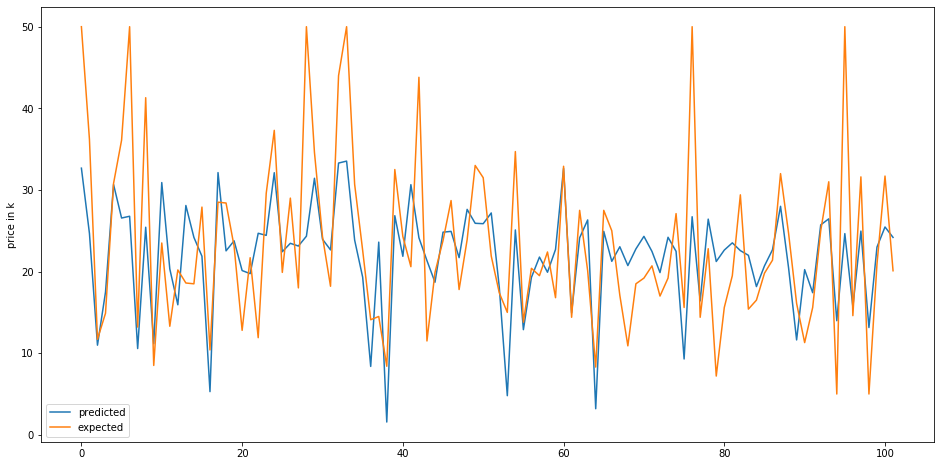

In [55]:
plt.figure(figsize=(16,8))
plt.plot(predicted,label="predicted")
plt.plot(expected,label="expected")
plt.ylabel("price in k")
plt.legend()
plt.show()

In [ ]:
# Visualize the model in TensorBoard


In [58]:
# This doesn't work, need to check more how to open tensorboard not on default python2.7 but in vm python3.7
# !tensorboard --logdir=data/ --host localhost --port 6006

### The high-level Estimator API

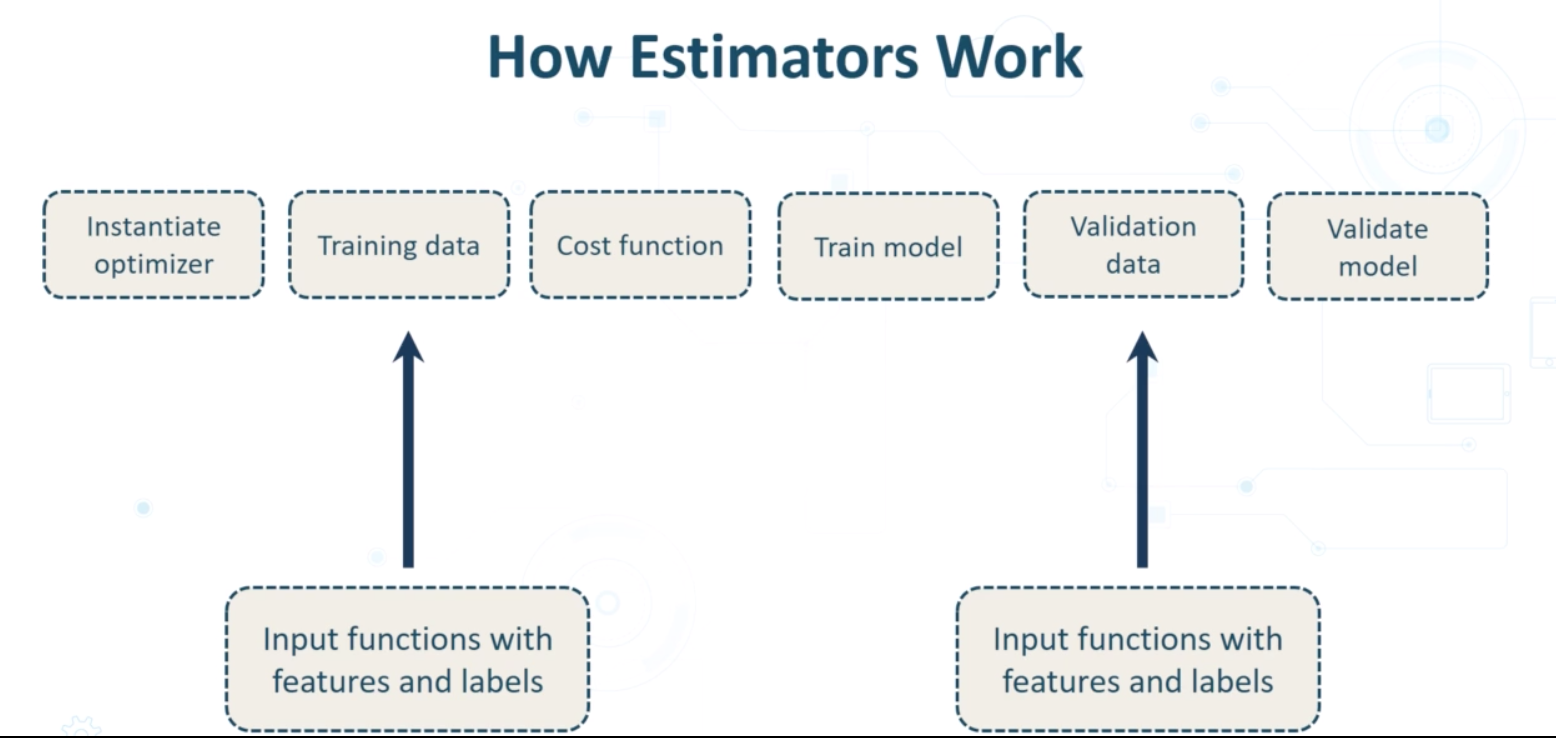

In [59]:
# Linear Regssion with Estimator

tf.reset_default_graph()
num_features = X_train.shape[1]


In [60]:
num_features

13

In [61]:
feat_cols = [tf.feature_column.numeric_column('x',shape=num_features)]
feat_cols

[NumericColumn(key='x', shape=(13,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [62]:
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x':X_train},
    Y_train,
    batch_size=12,
    num_epochs=epochs,
    shuffle=True)

In [63]:
linear_model = tf.estimator.LinearRegressor(feature_columns=feat_cols, optimizer='Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/9_/3m_lvmzs5t75xty5gvwr6wd558fj_g/T/tmpetik1c81', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [65]:
linear_model.train(input_fn = train_input_func,steps = 1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/9_/3m_lvmzs5t75xty5gvwr6wd558fj_g/T/tmpetik1c81/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss =

In [66]:
# Prediction using estimator

eval_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x':X_test},
    Y_test,
    batch_size=1,
    num_epochs=1,
    shuffle=False)
eval_input_func

<function tensorflow_estimator.python.estimator.inputs.numpy_io.numpy_input_fn.<locals>.input_fn()>

In [67]:
test_metrics = linear_model.evaluate(input_fn=eval_input_func, steps=100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-20T16:50:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9_/3m_lvmzs5t75xty5gvwr6wd558fj_g/T/tmpetik1c81/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [10/100]
INFO:tensorflow:Evaluation [20/100]
INFO:tensorflow:Evaluation [30/100]
INFO:tensorflow:Evaluation [40/100]
INFO:tensorflow:Evaluation [50/100]
INFO:tensorflow:Evaluation [60/100]
INFO:tensorflow:Evaluation [70/100]
INFO:tensorflow:Evaluation [80/100]
INFO:tensorflow:Evaluation [90/100]
INFO:tensorflow:Evaluation [100/100]
INFO:tensorflow:Inference Time : 0.59191s
INFO:tensorflow:Finished evaluation at 2020-10-20-16:50:26
INFO:tensorflow:Saving dict for global step 1000: average_loss = 171.74467, global_step = 1000, label/mean = 23.257008, loss = 171.74467, prediction/mean = 12.721336


In [68]:
test_metrics

{'average_loss': 171.74467,
 'label/mean': 23.257008,
 'loss': 171.74467,
 'prediction/mean': 12.721336,
 'global_step': 1000}

In [69]:
prediction_results = linear_model.predict(input_fn=eval_input_func)

In [70]:
prediction_results

<generator object Estimator.predict at 0x14d5d98b8>

In [71]:
prediction_list = list(prediction_results)
prediction_list

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9_/3m_lvmzs5t75xty5gvwr6wd558fj_g/T/tmpetik1c81/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([40.893772], dtype=float32)},
 {'predictions': array([21.823462], dtype=float32)},
 {'predictions': array([0.26545763], dtype=float32)},
 {'predictions': array([1.1556468], dtype=float32)},
 {'predictions': array([33.27434], dtype=float32)},
 {'predictions': array([29.43191], dtype=float32)},
 {'predictions': array([30.672745], dtype=float32)},
 {'predictions': array([-0.3972535], dtype=float32)},
 {'predictions': array([21.463114], dtype=float32)},
 {'predictions': array([-7.2908053], dtype=float32)},
 {'predictions': array([28.90581], dtype=float32)},
 {'predictions': array([4.338259], dtype=float32)},
 {'predictions': array([8.371086], dtype=float32)},
 {'predictions': array([14.472763], dtype=float32)},
 {'predictions': array([12.820013], dtype=float32)},
 {'predictions': array([3.3933234], dtype=float32)},
 {'predictions': array([-10.450785], dtype=float32)},
 {'predictions': array([36.6181], dtype=float32)},
 {'predictions': array([19.254826], dtype=float32

In [72]:
predictions=[]

for prediction in prediction_list:
    predictions.append(prediction['predictions'][0])

predictions[:5]

[40.893772, 21.823462, 0.26545763, 1.1556468, 33.27434]

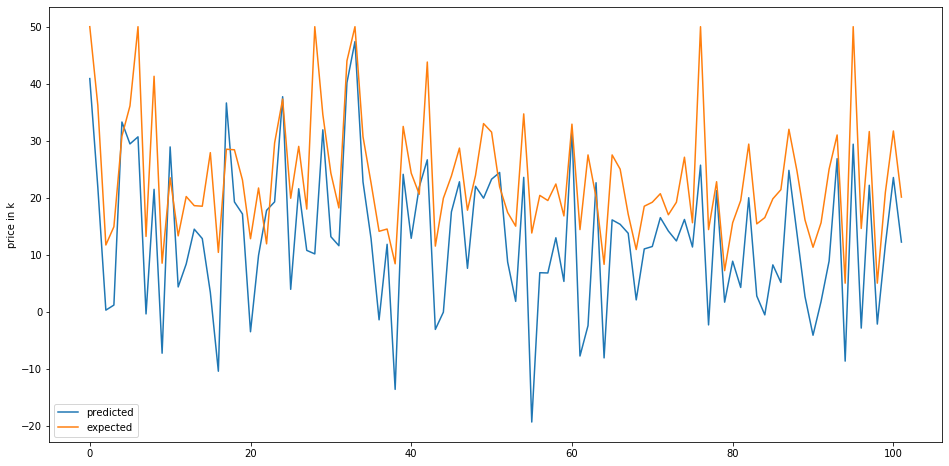

In [73]:
plt.figure(figsize=(16,8))
plt.plot(predictions,label="predicted")
plt.plot(expected,label="expected")
plt.ylabel("price in k")
plt.legend()
plt.show()